In [9]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline

# 단순회귀분석

In [2]:
insurance = pd.read_excel('Insurance.xls', engine="xlrd")

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


In [3]:
test_data = insurance.iloc[4::5].copy()
train_data = insurance.drop(test_data.index)

In [4]:
model = ols('Y ~ X', data=train_data).fit()

In [6]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     293.4
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           2.52e-22
Time:                        12:54:43   Log-Likelihood:                -253.75
No. Observations:                  51   AIC:                             511.5
Df Residuals:                      49   BIC:                             515.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.6047      6.911      2.403      0.0

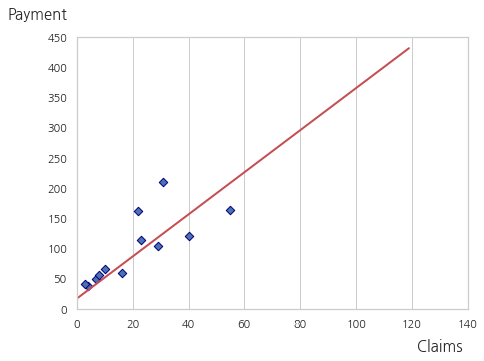

In [10]:
fig, axes = plt.subplots(figsize=(7, 5))
axes.scatter(x=test_data.X, y=test_data.Y, marker='D', edgecolor='navy')
plt.xlim((0, 140))
plt.ylim((0, 450))
# plt.xticks(color='w')
# plt.yticks(color='w')
fig.set_facecolor('w')
x = np.arange(0, 120)
axes.plot(x, model.params.Intercept + model.params.X * x, color='r', linewidth=2)
plt.grid(axis='y')
plt.text(-25, 480, 'Payment', fontsize=15)
plt.text(122, -70, 'Claims', fontsize=15)
plt.show()

In [11]:
test_data['pred'] = round(model.predict(test_data), 1)

In [12]:
test_data['err'] = round(abs(test_data.Y - test_data.pred), 1)

In [13]:
test_data['e_rate'] = round(test_data.err / test_data.Y * 100, 1)

In [14]:
test_data

,X,Y,pred,err,e_rate
4,40,119.4,155.9,36.5,30.6
9,10,65.3,51.4,13.9,21.3
14,7,48.8,41.0,7.8,16.0
19,23,113.0,96.7,16.3,14.4
24,29,103.9,117.6,13.7,13.2
29,4,38.1,30.5,7.6,19.9
34,22,161.5,93.2,68.3,42.3
39,16,59.6,72.3,12.7,21.3
44,55,162.8,208.1,45.3,27.8
49,3,39.9,27.1,12.8,32.1


# 다중회귀분석

## 메이저리그 야구 데이터

In [15]:
baseball = pd.read_excel('Baseball.xls', engine='xlrd')

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


X1 = batting average
X2 = runs scored/times at bat
X3 = doubles/times at bat
X4 = triples/times at bat
X5 = home runs/times at bat
X6 = strike outs/times at bat

In [16]:
baseball.columns = ['bat_avg', 'score', 'double', 'triple', 'hr', 'out']

In [17]:
test_data = baseball.iloc[4::5].copy()
train_data = baseball.drop(test_data.index)

In [19]:
target_features = ['score', 'double', 'triple', 'hr', 'out']
model = ols(f'bat_avg ~ {"+".join(target_features)}', data=train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                bat_avg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     28.58
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.47e-10
Time:                        12:55:52   Log-Likelihood:                 95.486
No. Observations:                  36   AIC:                            -179.0
Df Residuals:                      30   BIC:                            -169.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1909      0.021      8.920      0.0

In [20]:
target_features = ['score', 'double', 'hr', 'out']
model = ols(f'bat_avg ~ {"+".join(target_features)}', data=train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                bat_avg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     35.21
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           4.06e-11
Time:                        12:55:59   Log-Likelihood:                 94.785
No. Observations:                  36   AIC:                            -179.6
Df Residuals:                      31   BIC:                            -171.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1844      0.021      8.939      0.0

In [21]:
target_features = ['score', 'double', 'out']
model = ols(f'bat_avg ~ {"+".join(target_features)}', data=train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                bat_avg   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     46.05
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.03e-11
Time:                        12:56:05   Log-Likelihood:                 94.034
No. Observations:                  36   AIC:                            -180.1
Df Residuals:                      32   BIC:                            -173.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1715      0.017      9.880      0.0

In [22]:
test_data['pred'] = model.predict(test_data)

In [23]:
test_data['err'] = round(abs(test_data.bat_avg - test_data.pred), 4)

In [24]:
test_data['e_sqr'] = round(test_data.err**2,4)

In [25]:
test_data[['score', 'double', 'out', 'bat_avg', 'pred', 'err', 'e_sqr']]

,score,double,out,bat_avg,pred,err,e_sqr
4,0.161,0.044,0.076,0.290,0.291343,0.0013,0.0000
9,0.094,0.041,0.124,0.254,0.236819,0.0172,0.0003
14,0.189,0.058,0.032,0.329,0.333871,0.0049,0.0000
19,0.193,0.066,0.083,0.358,0.331309,0.0267,0.0007
24,0.206,0.054,0.048,0.325,0.335300,0.0103,0.0001
29,0.204,0.053,0.070,0.320,0.327330,0.0073,0.0001
34,0.087,0.038,0.142,0.221,0.224885,0.0039,0.0000
39,0.064,0.044,0.205,0.188,0.201434,0.0134,0.0002
44,0.150,0.053,0.115,0.277,0.284291,0.0073,0.0001


In [26]:
print(f'MAE: {round(test_data.err.mean(), 4)}\nRMSE:{round(test_data.e_sqr.mean(), 4)}')

MAE: 0.0103
RMSE:0.0002


### 조정된 결정계수

In [27]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                bat_avg   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     46.05
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.03e-11
Time:                        12:56:15   Log-Likelihood:                 94.034
No. Observations:                  36   AIC:                            -180.1
Df Residuals:                      32   BIC:                            -173.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1715      0.017      9.880      0.0

In [28]:
train_data['useless'] = pd.Series([-3, 1, -5, 1] * 9, index=train_data.index)

In [29]:
target_features = ['score', 'double', 'out', 'useless']
model = ols(f'bat_avg ~ {"+".join(target_features)}', data=train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                bat_avg   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     33.77
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           6.83e-11
Time:                        12:56:26   Log-Likelihood:                 94.173
No. Observations:                  36   AIC:                            -178.3
Df Residuals:                      31   BIC:                            -170.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1690      0.018      9.254      0.0

## Auto MPG 데이터

In [30]:
auto = pd.read_csv('auto-mpg.csv', sep='\s+', header=None)

In [31]:
auto.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']

In [32]:
auto.drop('name', axis=1, inplace=True)
auto.drop(auto[auto.horsepower=='?'].index, inplace=True)
auto.horsepower = auto.horsepower.astype(float).astype(int)

In [33]:
auto.reset_index(drop=True, inplace=True)

In [34]:
train_data = auto.sample(frac=0.601, random_state=12345)
val_data = auto.drop(train_data.index).sample(frac=0.5, random_state=12345)
test_data = auto.drop(train_data.index.append(val_data.index))

In [35]:
train_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
68,12.0,8,350.0,160,4456.0,13.5,72,1
202,32.0,4,85.0,70,1990.0,17.0,76,3
154,16.0,8,400.0,170,4668.0,11.5,75,1
333,32.4,4,107.0,72,2290.0,17.0,80,3
380,25.0,6,181.0,110,2945.0,16.4,82,1


In [36]:
def get_score(data, model):
    data['pred'] = model.predict(data)
    data['err'] = data.mpg - data.pred
    mae = abs(data.err).mean()
    rmse = ((data.err ** 2).mean())**(0.5)
    return [mae, rmse]

### A모델 : 모든 변수를 사용한 모델

In [37]:
target_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']
a_model = ols(f'mpg ~ {"+".join(target_features)}', data=train_data).fit()
print(a_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     142.9
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.07e-79
Time:                        12:56:45   Log-Likelihood:                -625.87
No. Observations:                 236   AIC:                             1268.
Df Residuals:                     228   BIC:                             1295.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -16.6763      6.136     -2.718   

In [38]:
get_score(train_data, a_model)

[2.6228019820491504, 3.4316411304892678]

In [39]:
get_score(val_data, a_model)

[2.4718336384134973, 3.349567931532051]

### F모델 : 전방향 선택으로 선택한 변수를 사용한 모델

In [40]:
formula = 'mpg ~ 1'
start_model = ols(formula, data=train_data).fit()
print(start_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 06 Feb 2022   Prob (F-statistic):                nan
Time:                        12:56:57   Log-Likelihood:                -824.61
No. Observations:                 236   AIC:                             1651.
Df Residuals:                     235   BIC:                             1655.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.2665      0.520     44.775      0.0

In [56]:
target_features = train_data.columns[1:-2]
selected_features = []
start_formula = 'mpg ~ '

for i in range(len(target_features)):
    formula = start_formula + '+'.join(selected_features) if len(selected_features) > 0 else start_formula + '1'
    start_model = ols(formula, data=train_data).fit()

    print(f"{'Start' if i == 0 else 'Step'}:    AIC={round(start_model.aic, 2)}")
    print(formula)

    temp = pd.DataFrame(columns=['feature', 'AIC'])
    temp = temp.append(pd.Series(['<none>', start_model.aic], index=['feature', 'AIC']), ignore_index=True)
    for feature in target_features:
        formula = start_formula + '+'.join(selected_features + [feature])
        temp_model = ols(formula, data=train_data).fit()
        temp = temp.append(pd.Series([' + '+feature, temp_model.aic], index=['feature', 'AIC']), ignore_index=True)
    temp.sort_values('AIC', ascending=True, inplace=True)
    display(temp)
    top_feature = temp.iloc[0, 0]
    if top_feature == '<none>':
          break
    else:
          selected_features.append(top_feature)

Start:    AIC=1651.22
mpg ~ 1


,feature,AIC
4,+ weight,1381.015152
2,+ displacement,1417.512697
3,+ horsepower,1431.253169
1,+ cylinders,1442.422115
6,+ model_year,1560.459668
7,+ origin,1569.953807
5,+ acceleration,1605.514774
0,<none>,1651.218135


Step:    AIC=1381.02
mpg ~  + weight


,feature,AIC
6,+ model_year,1271.635537
3,+ horsepower,1366.743315
5,+ acceleration,1373.893877
2,+ displacement,1377.677894
7,+ origin,1378.892216
1,+ cylinders,1379.665585
0,<none>,1381.015152
4,+ weight,1381.015152


Step:    AIC=1271.64
mpg ~  + weight+ + model_year


,feature,AIC
7,+ origin,1266.690934
0,<none>,1271.635537
4,+ weight,1271.635537
6,+ model_year,1271.635537
5,+ acceleration,1272.302350
3,+ horsepower,1272.678830
1,+ cylinders,1273.606782
2,+ displacement,1273.608939


Step:    AIC=1266.69
mpg ~  + weight+ + model_year+ + origin


,feature,AIC
0,<none>,1266.690934
4,+ weight,1266.690934
6,+ model_year,1266.690934
7,+ origin,1266.690934
5,+ acceleration,1266.860977
3,+ horsepower,1266.934306
2,+ displacement,1267.941231
1,+ cylinders,1268.661306


In [34]:
f_model = ols(f'mpg ~ {"+".join(selected_features)}', data=train_data).fit()
f_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     327.3
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           4.74e-83
Time:                        20:24:58   Log-Likelihood:                -629.35
No. Observations:                 236   AIC:                             1267.
Df Residuals:                     232   BIC:                             1281.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.9536      5.233     -3.240      0.001     -27.264      -6.643
weight        -0.0063      0.000    -18.285      0.000      -0.007      -0.006
model_year     0.7586      0.063     12.016      0.000       0.634       0.883
origin         0.9207      0.350      2.632      0.009       0.232       1.610
==============================================================================
Omnibus:                       20.310   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.674
Skew:                           0.514   Prob(JB):                     8.04e-08
Kurtosis:                       4.506   Cond. No.                     7.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
get_score(train_data, f_model)

(2.6144965793819246, 3.4826014147968998)

In [52]:
get_score(val_data, f_model)

(2.430005396735315, 3.398201007428583)

### B_Model: 역방향 제거로 선택한 변수를 사용한 모델

In [58]:
selected_features = train_data.columns[1:-2].tolist()
start_formula = 'mpg ~ '

for i in range(len(target_features)):
    formula = start_formula + '+'.join(selected_features) if len(selected_features) > 0 else start_formula + '1'
    start_model = ols(formula, data=train_data).fit()
    
    print(f"{'Start' if i == 0 else 'Step'}:    AIC={round(start_model.aic, 2)}")
    print(formula)
    
    temp = pd.DataFrame(columns=['feature', 'AIC'])
    temp = temp.append(pd.Series(['<none>', start_model.aic], index=['feature', 'AIC']), ignore_index=True)
    for feature in selected_features:
        formula = start_formula + '+'.join(list(filter(lambda x: x!=feature, selected_features)))
        temp_model = ols(formula, data=train_data).fit()
        temp = temp.append(pd.Series([' - '+feature, temp_model.aic], index=['feature', 'AIC']), ignore_index=True)
    temp.sort_values('AIC', ascending=True, inplace=True)
    display(temp)
    top_feature = temp.iloc[0, 0]
    if top_feature == '<none>':
          break
    else:
          selected_features.remove(top_feature[3:])

Start:    AIC=1267.73
mpg ~ cylinders+displacement+horsepower+weight+acceleration+model_year+origin


,feature,AIC
1,- cylinders,1266.304150
5,- acceleration,1266.641641
3,- horsepower,1267.205909
0,<none>,1267.733212
2,- displacement,1270.017623
7,- origin,1277.271416
4,- weight,1326.088663
6,- model_year,1366.742768


Step:    AIC=1266.3
mpg ~ displacement+horsepower+weight+acceleration+model_year+origin


,feature,AIC
4,- acceleration,1265.280366
2,- horsepower,1265.616250
0,<none>,1266.304150
1,- displacement,1268.589867
6,- origin,1275.461021
3,- weight,1327.959187
5,- model_year,1365.265647


Step:    AIC=1265.28
mpg ~ displacement+horsepower+weight+model_year+origin


,feature,AIC
0,<none>,1265.280366
1,- displacement,1266.934306
2,- horsepower,1267.941231
5,- origin,1274.123279
3,- weight,1335.659200
4,- model_year,1363.331559


In [51]:
b_model = ols(f'mpg ~ {"+".join(selected_features)}', data=train_data).fit()
f_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     327.3
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           4.74e-83
Time:                        20:52:20   Log-Likelihood:                -629.35
No. Observations:                 236   AIC:                             1267.
Df Residuals:                     232   BIC:                             1281.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.9536      5.233     -3.240      0.001     -27.264      -6.643
weight        -0.0063      0.000    -18.285      0.000      -0.007      -0.006
model_year     0.7586      0.063     12.016      0.000       0.634       0.883
origin         0.9207      0.350      2.632      0.009       0.232       1.610
==============================================================================
Omnibus:                       20.310   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.674
Skew:                           0.514   Prob(JB):                     8.04e-08
Kurtosis:                       4.506   Cond. No.                     7.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
get_score(train_data, b_model)

(2.628683887606697, 3.4429080583124434)

In [53]:
get_score(val_data, b_model)

(2.434016520928948, 3.361626944445173)

### S_Model: 양방향 선택과 제거로 선택한 변수를 사용한 모델

In [64]:
target_features = train_data.columns[1:-2]
selected_features = []
start_formula = 'mpg ~ '

for i in range(len(target_features)):
    formula = start_formula + '+'.join(selected_features) if len(selected_features) > 0 else start_formula + '1'
    start_model = ols(formula, data=train_data).fit()
    
    print(f"{'Start' if i == 0 else 'Step'}:    AIC={round(start_model.aic, 2)}")
    print(formula)
    
    temp = pd.DataFrame(columns=['feature', 'AIC'])
    temp = temp.append(pd.Series(['<none>', start_model.aic], index=['feature', 'AIC']), ignore_index=True)
    for feature in target_features:
        formula = start_formula + '+'.join(selected_features + [feature])
        temp_model = ols(formula, data=train_data).fit()
        temp = temp.append(pd.Series([' + '+feature, temp_model.aic], index=['feature', 'AIC']), ignore_index=True)
    
    if i > 0:
        for feature in selected_features:
            formula = start_formula + '+'.join(list(filter(lambda x: x!=feature, selected_features))) if len(selected_features) > 1 else start_formula + '1'
            temp_model = ols(formula, data=train_data).fit()
            temp = temp.append(pd.Series([' - '+feature, temp_model.aic], index=['feature', 'AIC']), ignore_index=True)
            
    temp.sort_values('AIC', ascending=True, inplace=True)
    display(temp)
    top_feature = temp.iloc[0, 0]
    if top_feature.startswith(' +'):
          selected_features.append(top_feature[3:])
    elif top_feature.startswith(' -'):
          selected_features.remove(top_feature[3:])
    else:
        break

Start:    AIC=1651.22
mpg ~ 1


,feature,AIC
4,+ weight,1381.015152
2,+ displacement,1417.512697
3,+ horsepower,1431.253169
1,+ cylinders,1442.422115
6,+ model_year,1560.459668
7,+ origin,1569.953807
5,+ acceleration,1605.514774
0,<none>,1651.218135


Step:    AIC=1381.02
mpg ~ weight


,feature,AIC
6,+ model_year,1271.635537
3,+ horsepower,1366.743315
5,+ acceleration,1373.893877
2,+ displacement,1377.677894
7,+ origin,1378.892216
1,+ cylinders,1379.665585
0,<none>,1381.015152
4,+ weight,1381.015152
8,- weight,1651.218135


Step:    AIC=1271.64
mpg ~ weight+model_year


,feature,AIC
7,+ origin,1266.690934
0,<none>,1271.635537
4,+ weight,1271.635537
6,+ model_year,1271.635537
5,+ acceleration,1272.302350
3,+ horsepower,1272.678830
1,+ cylinders,1273.606782
2,+ displacement,1273.608939
9,- model_year,1381.015152
8,- weight,1560.459668


Step:    AIC=1266.69
mpg ~ weight+model_year+origin


,feature,AIC
0,<none>,1266.690934
4,+ weight,1266.690934
6,+ model_year,1266.690934
7,+ origin,1266.690934
5,+ acceleration,1266.860977
3,+ horsepower,1266.934306
2,+ displacement,1267.941231
1,+ cylinders,1268.661306
10,- origin,1271.635537
9,- model_year,1378.892216


In [65]:
s_model = ols(f'mpg ~ {"+".join(selected_features)}', data=train_data).fit()

In [66]:
get_score(train_data, s_model)

(2.6144965793819246, 3.4826014147968998)

In [67]:
get_score(val_data, s_model)

(2.430005396735315, 3.398201007428583)

In [94]:
selected_features = train_data.columns[1:-2].tolist()
insignificant_features = True
              
while insignificant_features:
    p_model = ols(f'mpg ~ {"+".join(selected_features)}', data=train_data).fit()
    display(p_model.summary())
    insignificant_features = list(filter(lambda x: x != 'Intercept', p_model.pvalues[p_model.pvalues > 0.05].index.tolist()))
    selected_features = [feature for feature in selected_features if feature not in insignificant_features]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     142.9
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           1.07e-79
Time:                        22:05:06   Log-Likelihood:                -625.87
No. Observations:                 236   AIC:                             1268.
Df Residuals:                     228   BIC:                             1295.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -16.6763      6.136     -2.718      0.007     -28.766      -4.587
cylinders       -0.3140      0.423     -0.743      0.458      -1.147       0.519
displacement     0.0194      0.010      2.044      0.042       0.001       0.038
horsepower      -0.0213      0.018     -1.195      0.233      -0.057       0.014
weight          -0.0067      0.001     -8.151      0.000      -0.008      -0.005
acceleration     0.1290      0.138      0.938      0.349      -0.142       0.400
model_year       0.7419      0.067     11.036      0.000       0.609       0.874
origin           1.2769      0.378      3.380      0.001       0.532       2.021
==============================================================================
Omnibus:                       15.247   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.049
Skew:                           0.468   Prob(JB):                     4.43e-05
Kurtosis:                       4.078   Cond. No.                     8.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     245.4
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           6.47e-82
Time:                        22:05:06   Log-Likelihood:                -628.97
No. Observations:                 236   AIC:                             1268.
Df Residuals:                     231   BIC:                             1285.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.6645      5.301     -3.332      0.001     -28.110      -7.219
displacement     0.0052      0.006      0.857      0.392      -0.007       0.017
weight          -0.0068      0.001     -9.718      0.000      -0.008      -0.005
model_year       0.7735      0.066     11.805      0.000       0.644       0.903
origin           0.9991      0.362      2.762      0.006       0.286       1.712
==============================================================================
Omnibus:                       18.905   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.065
Skew:                           0.485   Prob(JB):                     2.96e-07
Kurtosis:                       4.455   Cond. No.                     7.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     327.3
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           4.74e-83
Time:                        22:05:06   Log-Likelihood:                -629.35
No. Observations:                 236   AIC:                             1267.
Df Residuals:                     232   BIC:                             1281.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.9536      5.233     -3.240      0.001     -27.264      -6.643
weight        -0.0063      0.000    -18.285      0.000      -0.007      -0.006
model_year     0.7586      0.063     12.016      0.000       0.634       0.883
origin         0.9207      0.350      2.632      0.009       0.232       1.610
==============================================================================
Omnibus:                       20.310   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.674
Skew:                           0.514   Prob(JB):                     8.04e-08
Kurtosis:                       4.506   Cond. No.                     7.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
get_score(train_data, p_model)

(2.6144965793819246, 3.4826014147968998)

In [96]:
get_score(val_data, p_model)

(2.430005396735315, 3.398201007428583)

### 최종 모델의 선정

In [6]:
# A_Model
def build_a_model(train_data, target_features, start_formula):
    return ols(start_formula + "+".join(target_features), data=train_data).fit()

In [29]:
# S_Model
def build_s_model(train_data, target_features, start_formula):
    selected_features = []
    for i in range(len(target_features)):
        formula = start_formula + '+'.join(selected_features) if len(selected_features) > 0 else start_formula + '1'
        start_model = ols(formula, data=train_data).fit()

        temp = pd.DataFrame(columns=['feature', 'AIC'])
        temp = temp.append(pd.Series(['<none>', start_model.aic], index=['feature', 'AIC']), ignore_index=True)
        for feature in target_features:
            formula = start_formula + '+'.join(selected_features + [feature])
            temp_model = ols(formula, data=train_data).fit()
            temp = temp.append(pd.Series([' + '+feature, temp_model.aic], index=['feature', 'AIC']), ignore_index=True)

        if i > 0:
            for feature in selected_features:
                formula = start_formula + '+'.join(list(filter(lambda x: x!=feature, selected_features))) if len(selected_features) > 1 else start_formula + '1'
                temp_model = ols(formula, data=train_data).fit()
                temp = temp.append(pd.Series([' - '+feature, temp_model.aic], index=['feature', 'AIC']), ignore_index=True)

        temp.sort_values('AIC', ascending=True, inplace=True)

        top_feature = temp.iloc[0, 0]
        if top_feature.startswith(' +'):
            selected_features.append(top_feature[3:])
        elif top_feature.startswith(' -'):
            selected_features.remoce(top_feature[3:])
        else:
            break

        return ols(f'mpg ~ {"+".join(selected_features)}', data=train_data).fit()

In [30]:
# P_Model
def build_p_model(train_data, selected_features, start_formula):
    insignificant_features = True

    while insignificant_features:
        model = ols(start_formula + "+".join(selected_features), data=train_data).fit()
        insignificant_features = list(filter(lambda x: x != 'Intercept', model.pvalues[model.pvalues > 0.05].index.tolist()))
        selected_features = [feature for feature in selected_features if feature not in insignificant_features]

    return model

In [71]:
result = pd.DataFrame()

for i in range(1, 11):
    train_data = auto.sample(frac=0.601)
    val_data = auto.drop(train_data.index).sample(frac=0.5)
    test_data = auto.drop(train_data.index.append(val_data.index))
    
    start_formula = 'mpg ~ '
    a_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']
    a_model = build_a_model(train_data, a_features, start_formula)
    a_score = pd.Series([i, a_model.rsquared_adj] + get_score(train_data, a_model) + get_score(val_data, a_model) + ['A_Model'], index=['split', 'adj_r', 'mae_t', 'rmse_t', 'mae_v', 'rmse_v', 'model']).T
    result = result.append(a_score, ignore_index=True)
    
    s_features = train_data.columns[1:-2]
    s_model = build_s_model(train_data, s_features, start_formula)
    s_score = pd.Series([i, s_model.rsquared_adj] + get_score(train_data, s_model) + get_score(val_data, s_model) + ['S_Model'], index=['split', 'adj_r', 'mae_t', 'rmse_t', 'mae_v', 'rmse_v', 'model']).T
    result = result.append(s_score, ignore_index=True)
    
    p_features = train_data.columns[1:-2].tolist()
    p_model = build_p_model(train_data, p_features, start_formula)
    p_score = pd.Series([i, p_model.rsquared_adj] + get_score(train_data, p_model) + get_score(val_data, p_model) + ['P_Model'], index=['split', 'adj_r', 'mae_t', 'rmse_t', 'mae_v', 'rmse_v', 'model']).T
    result = result.append(p_score, ignore_index=True)

In [72]:
result = result.pivot_table(index='split', columns=['model'])
result.columns = result.columns.swaplevel(0, 1)
result.sort_index(axis=1, level=0, inplace=True)
result = pd.concat([result, pd.DataFrame(result.mean(), columns=['AVG']).T])
result

model   A_Model                                           P_Model            \
          adj_r     mae_t     mae_v    rmse_t    rmse_v     adj_r     mae_t   
1.0    0.843279  2.319690  2.768019  2.952293  3.924534  0.844668  2.316590   
2.0    0.811934  2.417225  2.675513  3.232550  3.460579  0.811111  2.409634   
3.0    0.820107  2.410969  2.537137  3.233062  3.328791  0.820421  2.401330   
4.0    0.820555  2.511617  2.522108  3.272268  3.200189  0.819040  2.495193   
5.0    0.825130  2.489551  2.844481  3.250606  3.542268  0.824594  2.504077   
6.0    0.803029  2.583848  2.509980  3.389123  3.130481  0.798298  2.594300   
7.0    0.823251  2.599051  2.550275  3.440010  3.263953  0.821905  2.587080   
8.0    0.803688  2.598803  2.567715  3.439010  3.298739  0.801171  2.590635   
9.0    0.818947  2.561064  2.593251  3.300128  3.627967  0.814025  2.553589   
10.0   0.816912  2.467900  2.381692  3.164236  3.318176  0.812463  2.463192   
AVG    0.818683  2.495972  2.595017  3.267329  3.409568  0.816770  2.491562   

model                                 S_Model                                \
          mae_v    rmse_t    rmse_v     adj_r     mae_t     mae_v    rmse_t   
1.0    2.807491  2.964849  3.975602  0.729431  3.011694  3.710186  3.929841   
2.0    2.702124  3.267904  3.500961  0.689931  3.131399  3.702021  4.204937   
3.0    2.561660  3.258448  3.430031  0.703316  3.147873  3.514876  4.206240   
4.0    2.465606  3.314751  3.148375  0.689863  3.272296  3.371858  4.358132   
5.0    2.875529  3.269827  3.518742  0.684172  3.289405  3.206039  4.425599   
6.0    2.303021  3.459536  2.987205  0.676023  3.299665  3.125632  4.403353   
7.0    2.544767  3.483240  3.311792  0.711634  3.368909  3.446477  4.451373   
8.0    2.528086  3.491218  3.286840  0.676104  3.391650  3.112434  4.475105   
9.0    2.605205  3.373902  3.653060  0.701002  3.263013  3.571400  4.296378   
10.0   2.382692  3.230419  3.385480  0.689188  3.150273  3.273394  4.176652   
AVG    2.577618  3.311409  3.419809  0.695067  3.232618  3.403432  4.292761   

model            
         rmse_v  
1.0    5.112170  
2.0    4.693973  
3.0    4.626796  
4.0    4.150855  
5.0    3.940155  
6.0    4.027412  
7.0    4.233792  
8.0    4.146544  
9.0    4.840736  
10.0   4.391090  
AVG    4.416352

In [79]:
result = pd.DataFrame()

for i in range(1, 11):
    train_data = auto.sample(frac=0.601)
    val_data = auto.drop(train_data.index).sample(frac=0.5)
    test_data = auto.drop(train_data.index.append(val_data.index))
    
    start_formula = 'mpg ~ '
    
    p_features = train_data.columns[1:-2].tolist()
    p_model = build_p_model(train_data, p_features, start_formula)
    p_score = pd.Series([i] + get_score(train_data, p_model), index=['split', 'mae', 'rmse']).T
    result = result.append(p_score, ignore_index=True)

In [80]:
result = pd.concat([result, pd.DataFrame(result.mean(), columns=['AVG']).T])
result

,split,mae,rmse
0,1.0,3.354688,4.322552
1,2.0,3.265689,4.207673
2,3.0,3.314704,4.225051
3,4.0,3.219044,4.151308
4,5.0,3.216961,4.222827
5,6.0,3.364573,4.334652
6,7.0,3.241627,4.277353
7,8.0,3.159545,4.105467
8,9.0,3.417704,4.461976
9,10.0,3.257213,4.283562


In [84]:
result.loc['AVG', 'mae'] / auto.mpg.mean()

0.13994652803603705